In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lhcb_data = pd.read_csv('Data/popularity-728days.csv')
lhcb_data.irow(range(0,3))

,Name,Configuration,ProcessingPass,FileType,Type,Creation-week,NbLFN,LFNSize,NbDisk,DiskSize,...,95,96,97,98,99,100,101,102,103,104
0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08-MINBIAS-FIRST-14-NB/Stripping12d,MINIBIAS.DST,1,104591,67,0.317900,134,0.635799,...,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,BHADRON.DST,1,104607,227,0.649204,980,2.819260,...,1631,1631,1631,1631,1631,1631,1631,1631,1631,1631
2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,/LHCb/Collision10,/RealData/Reco08/Stripping14,CALIBRATION.DST,1,104607,355,1.370105,355,1.370105,...,0,0,0,474,708,708,708,708,708,708


In [3]:
test_data = lhcb_data.irow(np.random.choice(lhcb_data.index, 500))
test_data.shape

(500, 124)

In [4]:
risk_matrix = np.array([[0, 1],
                        [10000, 0]])

In [5]:
from datapop.LHCb import RecommendationSystem
rs = RecommendationSystem(forecast_horizont=26, class_abs_thresholds=1, risk_matrix=risk_matrix)
#report = rs.report(data=test_data)

In [6]:
report.irow(range(0,5))

NameError: name 'report' is not defined

In [ ]:
preprocessed_data = rs._get_preprocessed_data(test_data)
preprocessed_data.irow(range(0,5))

In [ ]:
rs._report2(preprocessed_data).irow(range(0,5))

#Performance

In [7]:
test_data = lhcb_data.irow(np.random.choice(lhcb_data.index, 1000))
test_data.shape

(1000, 124)

In [8]:
risk_matrix = np.array([[0, 1],
                        [1000, 0]])

In [11]:
from datapop.LHCb import RecommendationSystem
rs = RecommendationSystem(forecast_horizont=26, class_abs_thresholds=1, risk_matrix=risk_matrix)
report = rs.report(data=test_data)

KFold prediction using folds column
KFold prediction using folds column


In [12]:
preprocessed_data = rs._get_preprocessed_data(test_data)

In [13]:
from datapop.core import Simulator
core_sim = Simulator()
period_data = core_sim.get_period(data=preprocessed_data, period='78', forecast_horizont=26, class_abs_thresholds=1)

/Users/mikhail91/.virtualenvs/rep_0_6_1/lib/python2.7/site-packages/pandas/computation/expressions.py:184: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


In [14]:
period_report = rs._report2(period_data)

KFold prediction using folds column
KFold prediction using folds column


In [16]:
from datapop.LHCb import Performance
per = Performance()

In [17]:
roc_auc = per.get_roc_auc(report=period_report, period_data=period_data)
roc_auc

0.58683473389355745

In [18]:
mistakes = per.get_mistakes_matrix(report=period_report, period_data=period_data)
mistakes

141

In [19]:
(report['Recommended_Type']==1).shape

(1000,)

In [20]:
period_data['DiskSize'].shape

(895,)

In [21]:
(period_data['DiskSize'])[period_report['Recommended_Type'].values==1].sum(axis=0)

373.373245

In [22]:
per.get_total_size(report=period_report, period_data=period_data)

(373.373245, 366.24750699999998)

#Simulation

In [6]:
from datapop.LHCb import LHCbSimulator
sim = LHCbSimulator(data=test_data,\
                   begin=52, step=5,\
                   recommendation_system=rs)

In [7]:
simulation_report = sim.simulation_report()

KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column
KFold prediction using folds column


/Users/mikhail91/.virtualenvs/rep_0_6_1/lib/python2.7/site-packages/pandas/computation/expressions.py:184: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))
/Users/mikhail91/Documents/Github/DataPopularity/datapop/datapop/core/Simulator.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if forecast_horizont!=None and class_abs_thresholds!=None:


In [8]:
simulation_report

,Periods,ROC_AUC,Mistakes,Recommended_total_disk_size,True_total_disk_size
0,52,0.505938,140,371.263129,386.587886
1,57,0.535610,124,380.021614,396.137702
2,62,0.579910,103,398.757214,394.138126
3,67,0.567353,95,406.164176,409.028577
4,72,0.632545,84,424.716681,411.463354
5,77,0.631026,73,438.138570,392.566009


In [9]:
dp = simulation_report

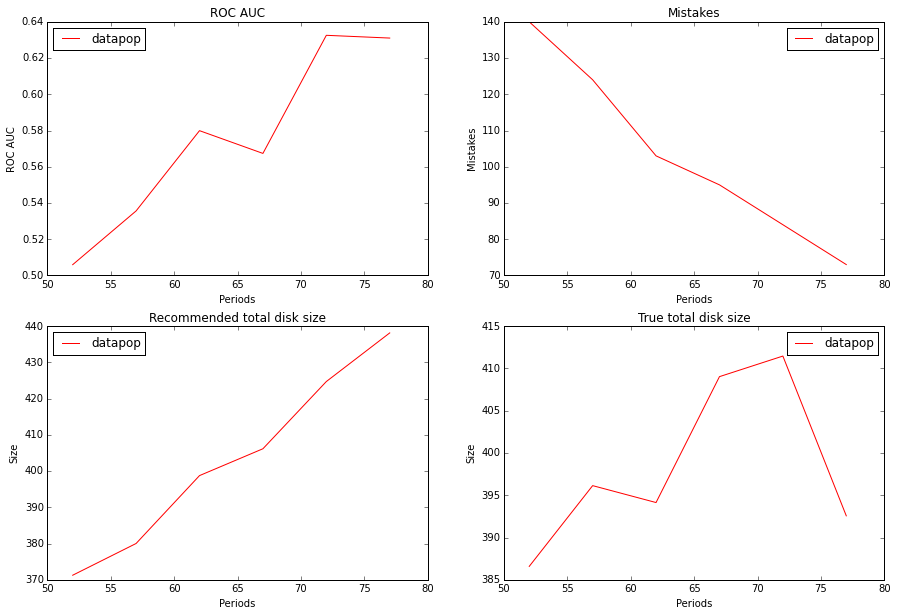

In [10]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
dp = simulation_report
plt.plot(dp.Periods, dp.ROC_AUC, label='datapop', c='r')
plt.title('ROC AUC')
plt.xlabel('Periods')
plt.ylabel('ROC AUC')
plt.legend(loc='best')

plt.subplot(2,2,2)
plt.plot(dp.Periods, dp.Mistakes, label='datapop', c='r')
plt.title('Mistakes')
plt.xlabel('Periods')
plt.ylabel('Mistakes')
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.plot(dp.Periods, dp.Recommended_total_disk_size, label='datapop', c='r')
plt.title('Recommended total disk size')
plt.xlabel('Periods')
plt.ylabel('Size')
plt.legend(loc='best')

plt.subplot(2,2,4)
plt.plot(dp.Periods, dp.True_total_disk_size, label='datapop', c='r')
plt.title('True total disk size')
plt.xlabel('Periods')
plt.ylabel('Size')
plt.legend(loc='best')